### Generate Points
Create Points using mouse point and click.\
Uses a list of tuples.\
Storing them in a pickle file for future use.

In [5]:
import turtle
points = []
turtle.hideturtle()
turtle.color("white")
def get_mouse_click_coor(x, y):
    points.append((x, y))
    turtle.goto(x, y)
    turtle.dot(5,"black")

turtle.onscreenclick(get_mouse_click_coor)
turtle.mainloop()

# with open("points.csv","a") as f:
#     for x, y in points:
#         f.write(f"{x},{y}\n")

import pickle
with open("points.pickle", "wb") as pl:
    pickle.dump(points, pl)

print(points)

[(-257.0, 169.0), (176.0, 187.0), (179.0, 39.0), (218.0, -72.0)]


Retrieving the Points stored in the pickle file.

In [8]:
# with open("points.csv", "r") as f:
#     points = [[float(coordinate)
#                for coordinate in line[:-1].split(',')]
#               for line in f]
import pickle
with open("points.pickle", "rb") as pl:
    points = pickle.load(pl)
from numpy import array
points = array(points)
points.shape

(12, 2)

Visualizing Points

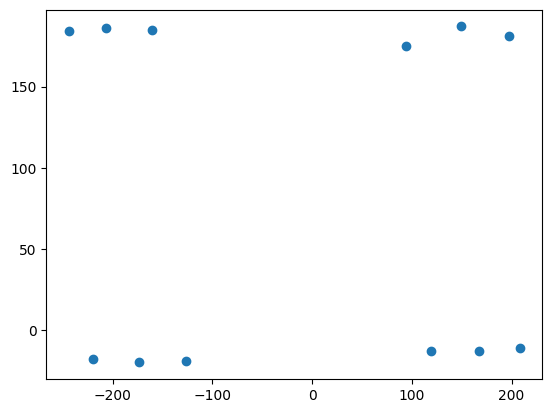

In [9]:
import matplotlib.pyplot as plt
plt.scatter(*points.T)
plt.show()

### KMeans Clustering

c:\Users\Saalim Khan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


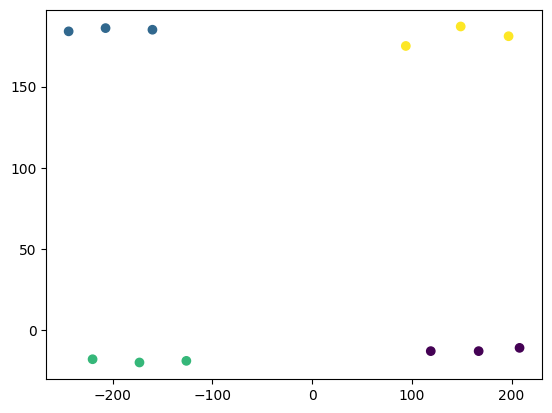

In [12]:
from sklearn.cluster import KMeans
kmeans_model=KMeans(n_clusters=4)
kmeans_model.fit(points)
plt.scatter(*points.T, c=kmeans_model.labels_)
plt.show()

### DBSCAN Clustering

[0 0 0 1 1 1 0 0 0 1 1 1]


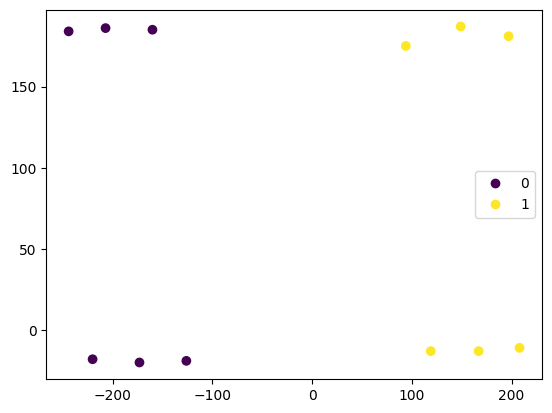

In [19]:
from sklearn.cluster import DBSCAN
dbscan_model = DBSCAN(eps=210)
labels = dbscan_model.fit_predict(points)
print(labels)
scatter = plt.scatter(*points.T, c=labels)
legend_elems = scatter.legend_elements()
plt.legend(handles=legend_elems[0], labels=legend_elems[1], loc="best")
plt.show()